<a href="https://colab.research.google.com/github/SudeepSarkar/Undergraduate-Computer-Vision/blob/main/CAP_4410_Lecture_2_2D_Geometric_Primitives_and_Transformations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Copyright (c) 2021, Sudeep Sarkar, University of South Florida, Tampa

# 2D Geometric Transformation

* Application: Panography (See 6.1.2 (or 8.1.2) of the first (second) editon textbook.)

> > "One of the simplest (and most fun) applications of image alignment is a special form of image stitching called [panography](https://www.flickr.com/groups/panography/). In a panograph, images are translated and optionally rotated and scaled before blended with simple averaging."

> > "This process mimics the photographic collages created by artist [David Hockney](https://www.hockney.com/works/photos/photographic-collages), although his compositions use an opaque overlay model, being created out of regular photographs."

* Another application - stich together images from a pan-tilt camera to create one composite picture for surveillance applications.

* A recent application of 2D geometric transformations is in expanding the size of an image training data by augmenting the given image set with multiple transformations of each image. This process is called **image augmentation** in deep learning.

* To match images taken from different viewpoints we need to understand the transformations between them.

See Section 2.1 (second edition) Section 3.6 (second edition) for reading materials on geometric transformations.




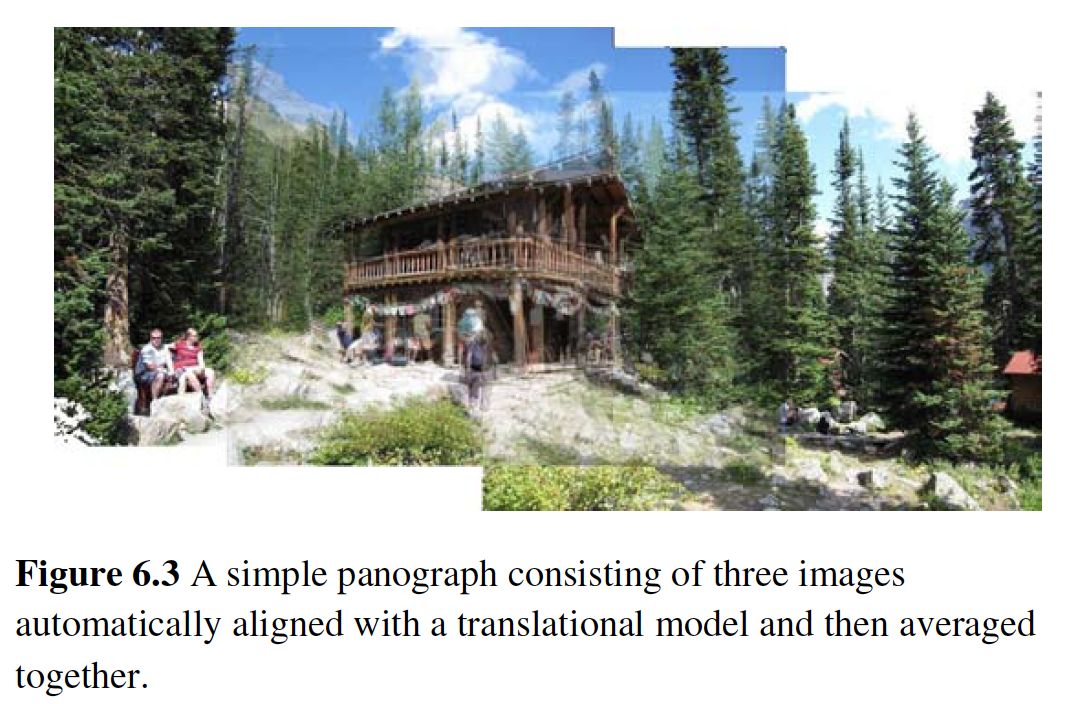

# 2D Geometric Transformation

See images below -- observe the geometric transformation between the planar surfaces between the two views. What is the mathematical relationship between them? How can we match image regions in a geometrically consistent manner? If you are tracking points on a plane, what model can we use as the underlying state model? What are some of the geometric models we can try? 

We will start with 2D transformations. But, first, we will study some mathematical preliminaries.


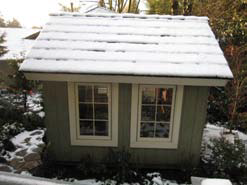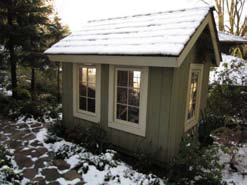

# Forward warping algorithm

**Problem**: The process of copying a pixel $f(x)$ to a location $x'$ in $g(x)$ is not well defined when $x'$ has a non-integer value.

> One solution: *splatting*: “distribute” the value among the four nearest neighbors in a weighted (bilinear) fashion, keeping track of the per-pixel weights and normalizing at the end.  However, this approach suffers from aliasing and a fair amount of blur (loss of high-resolution detail). Also, cracks and holes appear when magnifying an image.

**Solution**: Inverse warping.

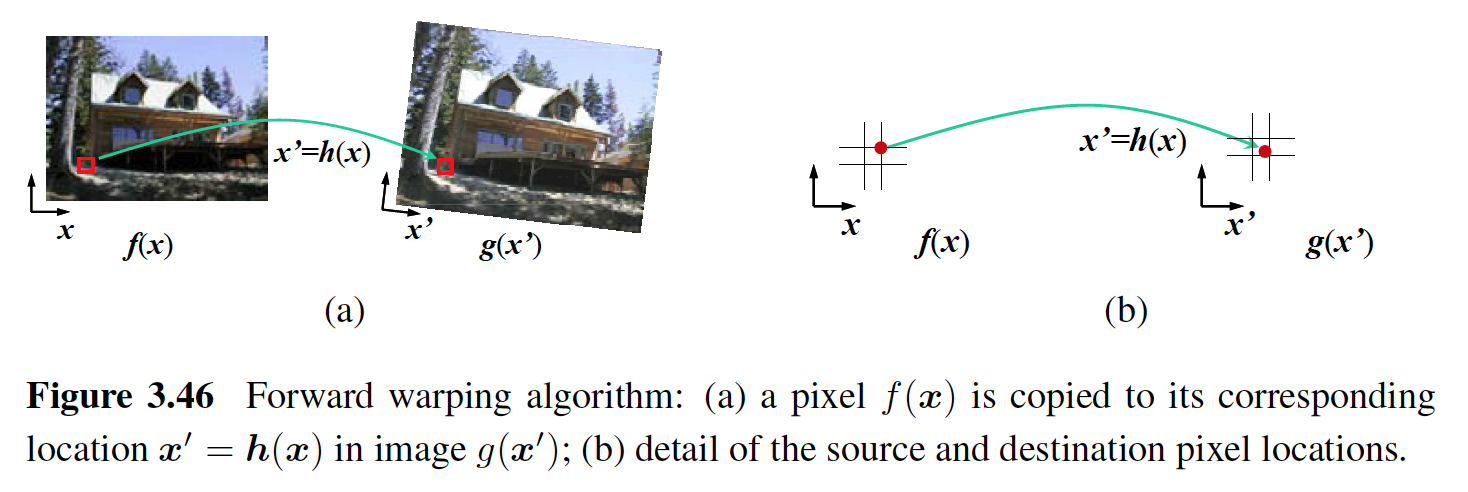

# Inverse mapping (preferred)

No holes!

It is preferable to formulate the problem of image warping as that of resampling
a source image $f(\mathbf{x})$ given a mapping $\mathbf{x} = h(\mathbf{x'})$ from destination pixels $\mathbf{x'}$ to source pixels $\mathbf{x}$.

To compute the value of $f(\mathbf{x})$ at a non-integer location $\mathbf{x}$, we can employ bilinear interpolation among the neighboring pixels. For better results, there are many methods from graphics. See Section 6.1.1 of your textbook for more ideas.

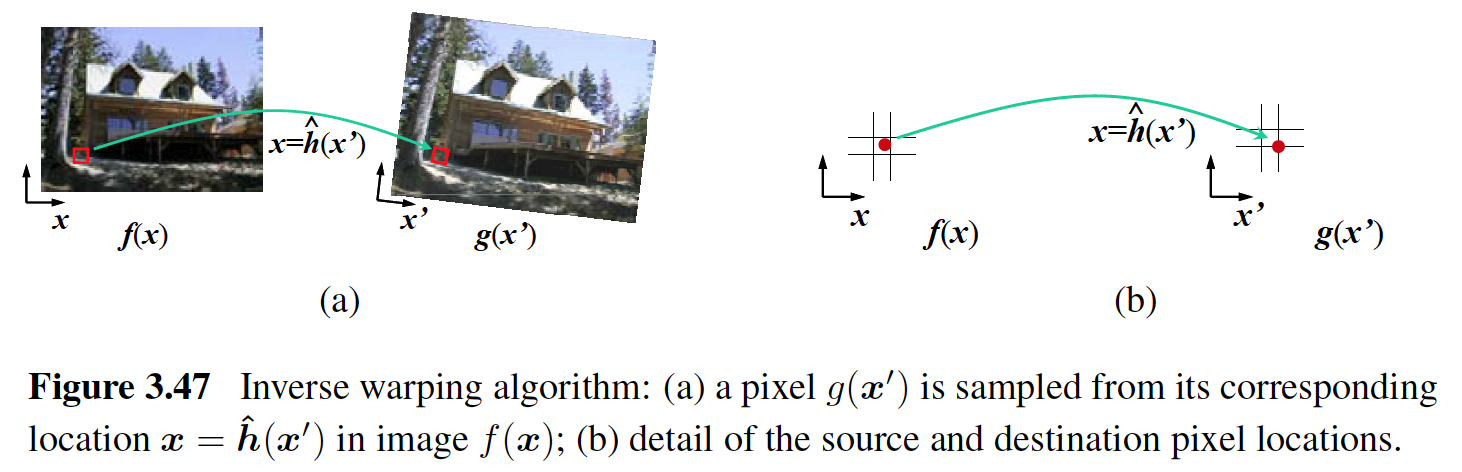

##Code: Setup Initialize

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from skimage import io
from skimage.color import rgb2gray

from scipy import ndimage as scimage
# SciPy (pronounced “Sigh Pie”) is a Python-based ecosystem of open-source software for mathematics, science, and engineering.
# https://www.scipy.org/

np.set_printoptions(precision=2)

In [2]:
from google.colab import drive
drive.mount('/content/drive')
!ls '/content/drive/MyDrive/Colab Notebooks/CAP 4410 - UG Computer Vision/data/'

Mounted at /content/drive
 apple.jpg				     mountain_peak_2.png
'Armes 1.png'				     parking_lot_meva_1.png
'Armes 2.png'				     parking_lot_meva_2.png
 declaration_of_independence_stone_630.jpg   parking_lot_meva_3.png
 house_1.png				    'Superbowl 2021_1.png'
 house_2.png				    'Superbowl 2021_2.png'
 lizard.jpg				    'Superbowl 2021_3.png'
 mountain_peak_1.png


##Code: Inverse Warping Function

width= 50 height= 70
width= 100 height= 70


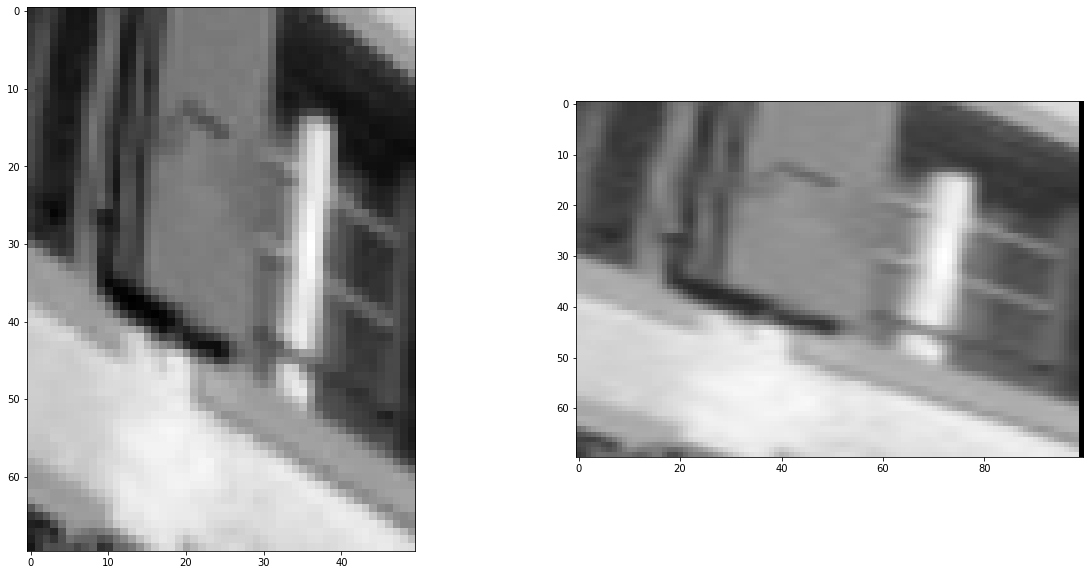

In [5]:
def inverse_warp (from_image_f, h, inv_h) :
    # h is a function that forward mapping function from f to g
    # inh_h is the function that mapps from g to f

    height_f, width_f = from_image_f.shape
    print('width=', width_f, 'height=', height_f)

    # First, map the corners of the from_image_f to decide on the size of to_image_g 
    # note the domain of indices for the final image is different from starting image
    # the forward map, h, is used to figure the boundary of the output domain.
    cx = []
    cy = []
    for fx in range(0, width_f+1, width_f) : # loops over the corner of from_image_f
        for fy in range(0, height_f+1, height_f) :
            x, y = h(fx, fy)
            cx.append(x)
            cy.append(y)
    max_x = np.max(cx).astype(int)
    max_y = np.max(cy).astype(int)
    min_x = np.min(cx).astype(int)
    min_y = np.min(cy).astype(int)
    width_g = (max_x - min_x)
    height_g = (max_y - min_y)
    print('width=', width_g, 'height=', height_g)
    to_image_g = np.zeros((height_g, width_g))

    # Second, find the pixel values in the output image using inverse map, h_inv
    for gx in range (min_x, max_x) : # Note the range of the iterator values. Why?
        for gy in range (min_y, max_y) :
            fx, fy = inv_h(gx, gy)
            to_image_g[gy-min_y, gx-min_x] = scimage.map_coordinates(from_image_f, [[fy], [fx]], order=3)
            # Why are we subtracting min_y and min_x above? 
            # Why y index is used before x index?
    return(to_image_g)

def h (x, y) :
    #return (x, y)
    return (2*x+10, y+5)

def h_inv (x, y):
    #return (x, y)
    return ((x-10)/2, y-5)
    

# Load an color image in grayscale
img = io.imread('//content/drive/MyDrive/Colab Notebooks/CAP 4410 - UG Computer Vision/data/Armes 1.png')
img = rgb2gray(img)

img = img.astype(np.float)  # need to change type from uint8 to float
img = img[30:100, 50:100]  # consider only a subimage

out = inverse_warp (img, h, h_inv)

fig, axs = plt.subplots(1, 2)
fig.set_size_inches (20, 10)
axs[0].imshow(img, 'gray')
axs[1].imshow(out, 'gray');

## Code: Inverse Warp with specified output image size

width= 50 height= 70


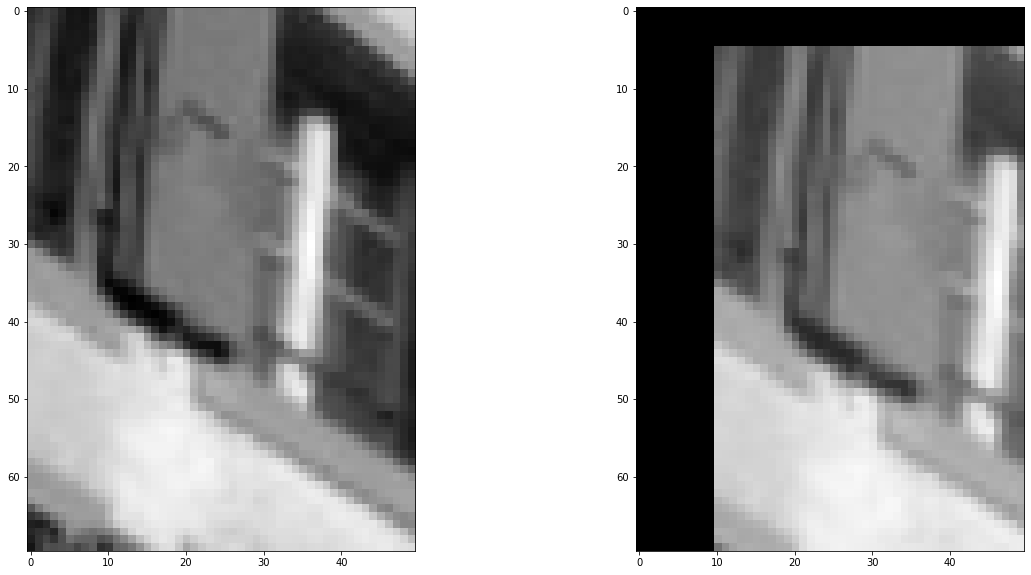

In [9]:
def inverse_warp_2 (from_image_f, inv_h, output_shape) :
    # This function is similar in fuction to the warp function in scikit
    # The output image size is part of the input here.
    # inv_h is the function that mapps from g to f

    # Another way to appreciate the difference between inverse_warp and inverse_warp2 is to 
    # consider just a translation transformation. inverse_warp will produce an output image
    # that is exactly the same as the input. Whereas, inverse_warp_2 will produce a shifted 
    # image.

    height_f, width_f = from_image_f.shape
    print('width=', width_f, 'height=', height_f)

    to_image_g = np.zeros(output_shape)

    # Second, find the pixel values in the output image using inverse map, h_inv
    for gx in range (output_shape[1]) :
        for gy in range (output_shape[0]) :
            fx, fy = inv_h(gx, gy)
            to_image_g[np.max(gy, 0), np.max(gx, 0)] = scimage.map_coordinates(from_image_f, [[fy], [fx]], order=3)
 
    return(to_image_g)


def h (x, y) : # just a shift transformation
    #return (x, y)
    return (x+10, y+5)

def h_inv (x, y):
    #return (x, y)
    return (x-10, y-5)
    

# Load an color image in grayscale
img = io.imread('//content/drive/MyDrive/Colab Notebooks/CAP 4410 - UG Computer Vision/data/Armes 1.png')
img = rgb2gray(img)

img = img.astype(np.float)  # need to change type from uint8 to float
img = img[30:100, 50:100] # consider only a subimage


out = inverse_warp_2 (img, h_inv, img.shape)  #output image size is the same as the input

fig, axs = plt.subplots(1, 2)
fig.set_size_inches (20, 10)
axs[0].imshow(img, 'gray')
axs[1].imshow(out, 'gray');


# Mathematical formulation of different types of transformations

See Section 2.1 of the textbook for this material

**Homogeneous coordinates of points:** 

* A 2D points, $\mathbf{x} = \begin{bmatrix} x \\ y \end{bmatrix}$, is mapped to a 3D line through the origin given by 

\begin{equation}
\widetilde{\mathbf{x}} = w \begin{bmatrix}
        x \\ y\\ 1
    \end{bmatrix}
\end{equation}
    
* We can transform a 2D representation to a 3-dimensional representation and vice-versa. This is a theoretical 3D space, not the 3D world we live in. We will study the fully 3D world model later. Here, we explore the 2D world through 3D theoretical representations.

* The use of homogeneous coordinates make the representation of the transformations simpler, notation-wise. *Many transformations can be described as matrix multiplication, making it easier to represent a chain of transformations as simple matrix multiplications*.

**Homogeneous coordinates of 2D lines:**

* Equation of a 2D line can be written as $a x + b y + c = 0$ or as 

\begin{equation}
\begin{bmatrix}
        a & b & c
    \end{bmatrix}\begin{bmatrix}
        x \\ y \\ 1 
    \end{bmatrix} = 0 
\end{equation}
    
> > or as 

\begin{equation}
\widetilde{\mathbf{n}}^T \widetilde{\mathbf{x}} = 0,
\end{equation},

> > where $\widetilde{\mathbf{n}}$ is the homogeneous representation of a line. 

* Note that the homogeneous representation of a line is the same as a point. Scaled version of the homogeneous representation, $w \widetilde{\mathbf{n}}$ represents the same line, as $w a x + w b y + w c = w (a x + b y + c) = 0$

**Intersection of two 2D lines**

* In terms of homogeneous coordinates, the intersection of two lines is given by the **cross-product** of the line representations.

\begin{equation}
\widetilde{\mathbf{x}} = \widetilde{\mathbf{n_1}} \times \widetilde{\mathbf{n_2}}
\end{equation}

**Line joining two 2D points**

* The line joining two points is given by the **cross-product** of the two-point representations.

\begin{equation}
\widetilde{\mathbf{n}} = \widetilde{\mathbf{x_1}} \times \widetilde{\mathbf{x_2}}
\end{equation}


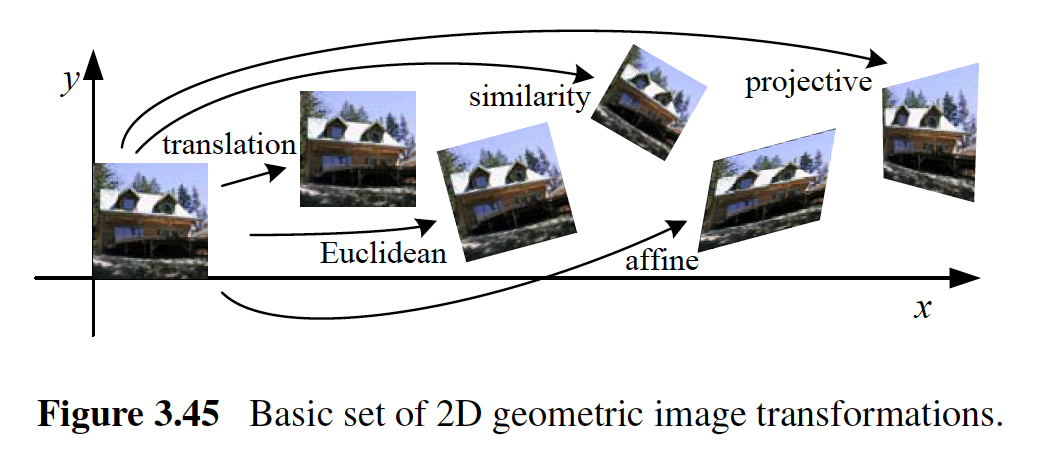

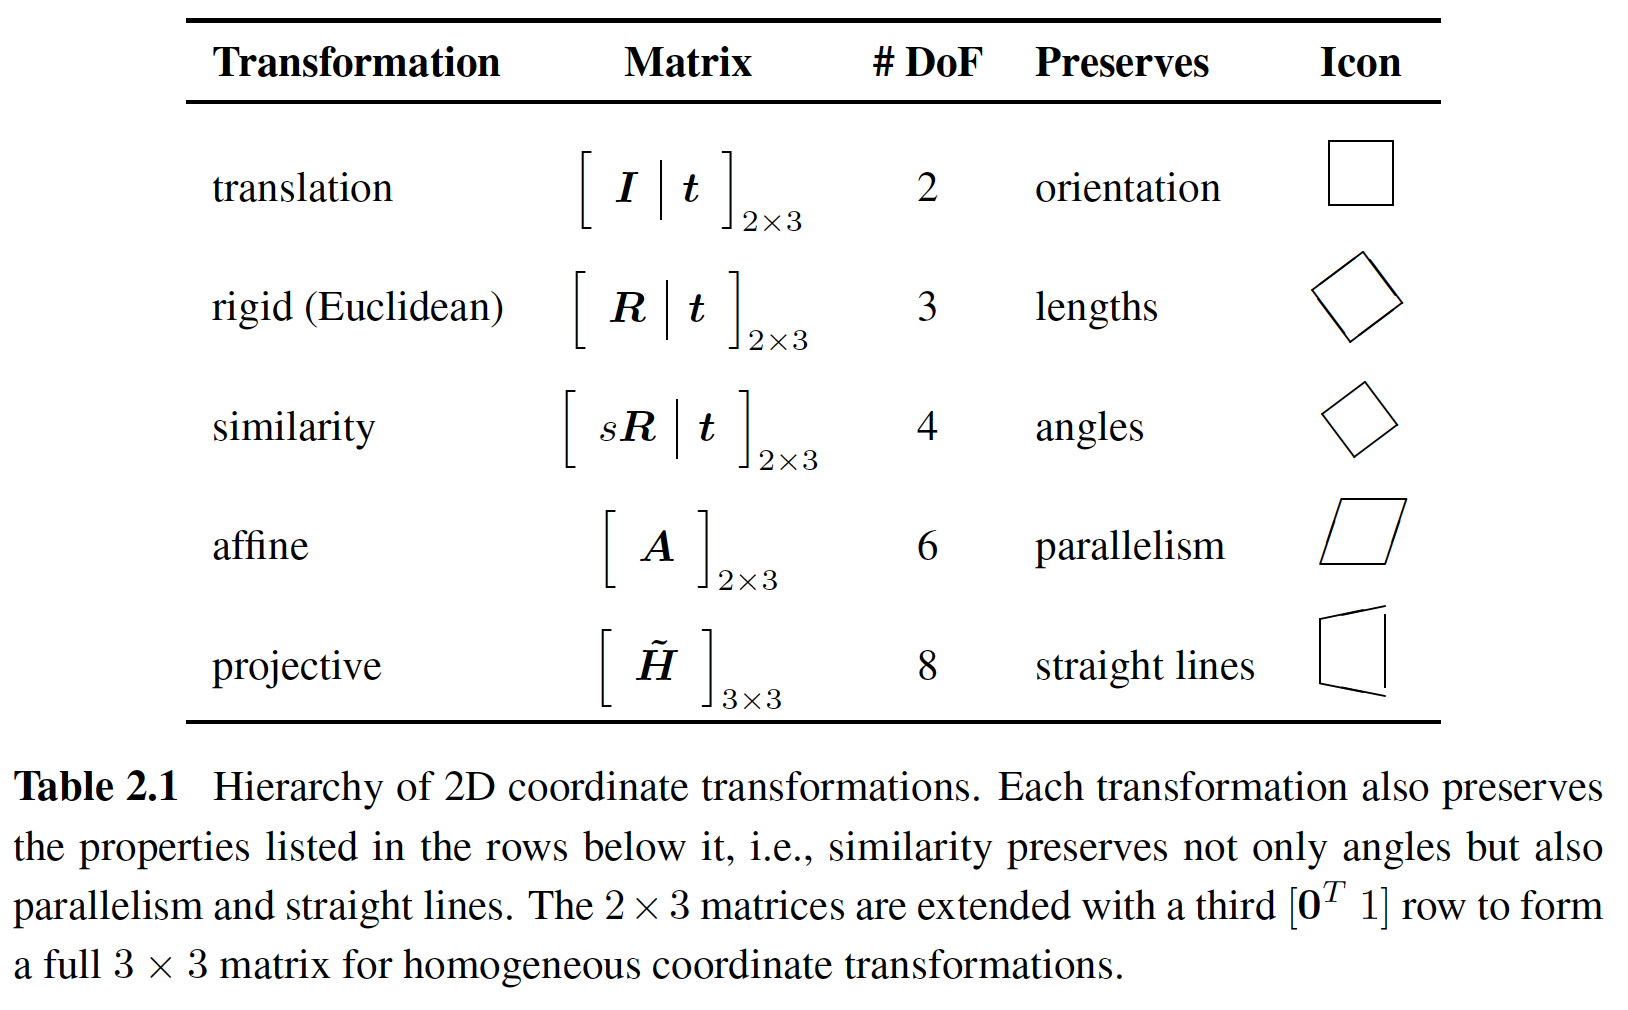

# 1. Translation 

Just translation preserves orientation, angles, and length
 
\begin{eqnarray}
        \mathbf{x}' & = & \mathbf{x} +\mathbf{t} \\
        \begin{bmatrix}
            x' \\ y' 
        \end{bmatrix} & = & \begin{bmatrix}
            x \\ y 
        \end{bmatrix} + \begin{bmatrix}
            t_x \\ t_y 
        \end{bmatrix} 
\end{eqnarray}

We can express the same in homogeneous coordinates as:
    
\begin{eqnarray}
        \begin{bmatrix}
            x' \\ y' \\ 1
        \end{bmatrix} & = & 
         \begin{bmatrix}
            1 & 0 & t_x \\
            0 & 1 & t_y \\
            0 & 0 & 1
        \end{bmatrix} 
        \begin{bmatrix}
            x \\ y \\ 1
        \end{bmatrix} \\
        \widetilde{\mathbf{x}'} & = & 
        \begin{bmatrix}
            \mathbf{I}^{2 \times 2} & \mathbf{t}^{2 \times 1} \\
            \mathbf{0}^{1 \times 2} & 1
        \end{bmatrix}
        \widetilde{\mathbf{x}}
\end{eqnarray}
    

# 2. Rotation and translation:

A rotation and translation of an image patch preserves angles and length
    
    
\begin{eqnarray}
    \mathbf{x}' & = & \mathbf{R}^{2 \times 2}\mathbf{x} +\mathbf{t} \\
    \begin{bmatrix}
        x' \\ y' 
    \end{bmatrix} & = & 
    \begin{bmatrix}
        \cos(\theta) & - \sin (\theta) \\
        \sin (\theta) & \cos (\theta)
    \end{bmatrix}
    \begin{bmatrix}
        x \\ y 
    \end{bmatrix} + \begin{bmatrix}
        t_x \\ t_y 
    \end{bmatrix} 
\end{eqnarray}

We can express the same in homogeneous coordinates as:
    
\begin{eqnarray}
    \begin{bmatrix}
        x' \\ y' \\ 1
    \end{bmatrix} & = & 
        \begin{bmatrix}
        \cos(\theta) & - \sin (\theta)& t_x \\
        \sin (\theta) & \cos (\theta) & t_y \\
        0 & 0 & 1
    \end{bmatrix} 
    \begin{bmatrix}
        x \\ y \\ 1
    \end{bmatrix} \\
    \widetilde{\mathbf{x}'} & = & 
    \begin{bmatrix}
        \mathbf{R}^{2 \times 2} & \mathbf{t}^{2 \times 1} \\
        \mathbf{0}^{1 \times 2} & 1
    \end{bmatrix}
    \widetilde{\mathbf{x}}
\end{eqnarray}
    
The rotation matrix is not any $2 \times 2$ matrix. It has certain properties it has to satisfy: $\mathbf{R}\mathbf{R}^T = \mathbf{R}^T\mathbf{R} = \mathbf{I}$ and $\det (\mathbf{R}) = 1$. The columns and rows are orthogonal to each other and their individual magnitude is one. In other words, the matrix is an **orthonormal** matrix.

## Code: Rotation

width= 50 height= 70
width= 84 height= 84


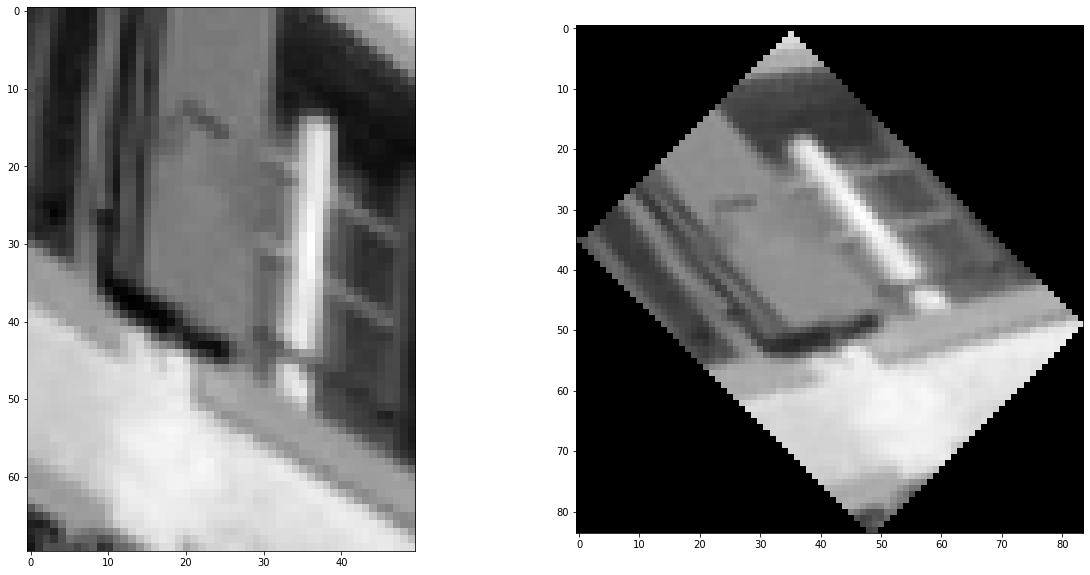

In [13]:
theta = -45*np.pi/180
t = np.array([0,0])

def h (x, y) :
    global theta, t
    R = np.array([[np.cos(theta), - np.sin(theta), t[0]],
                 [np.sin(theta),   np.cos(theta), t[1]],
                 [0            , 0              ,  1 ]]) 
    
    out = R @ np.array([[x],[y],[1]])
    return(out[0]/out[2], out[1]/out[2])

def h_inv (x, y):
    global theta, t
    R_inv = np.array([[np.cos(theta),  np.sin(theta), -t[0]],
                 [-np.sin(theta),   np.cos(theta), -t[1]],
                 [0            , 0              ,  1 ]]) 
    
    out = R_inv @ np.array([[x],[y],[1]]) 
    return(out[0]/out[2], out[1]/out[2])

    
out = inverse_warp (img, h, h_inv)


fig, axs = plt.subplots(1, 2)
fig.set_size_inches (20, 10)
axs[0].imshow(img, 'gray')
axs[1].imshow(out, 'gray');

# 3. Similarity Transformation 

If we allow for scaling, rotation, and translation only angles will be preserved.
    
\begin{eqnarray}
    \mathbf{x}' & = & s \mathbf{R}\mathbf{x} +\mathbf{t} \\
    \begin{bmatrix}
        x' \\ y' 
    \end{bmatrix} & = & 
    \begin{bmatrix}
        s \cos(\theta) & - s \sin (\theta) \\
        s \sin (\theta) & s \cos (\theta)
    \end{bmatrix}
    \begin{bmatrix}
        x \\ y 
    \end{bmatrix} + \begin{bmatrix}
        t_x \\ t_y 
    \end{bmatrix} 
\end{eqnarray}

We can express the same in homogeneous coordinates as:
    
\begin{eqnarray}
    \begin{bmatrix}
        x' \\ y' \\ 1
    \end{bmatrix} & = & 
        \begin{bmatrix}
        s \cos(\theta) & - s \sin (\theta)& t_x \\
        s \sin (\theta) & s \cos (\theta) & t_y \\
        0 & 0 & 1
    \end{bmatrix} 
    \begin{bmatrix}
        x \\ y \\ 1
    \end{bmatrix} \\
    \widetilde{\mathbf{x}'} & = & 
    \begin{bmatrix}
        \begin{bmatrix}
            a & -b \\
            b & a
        \end{bmatrix} & \mathbf{t}^{2 \times 1} \\
        \mathbf{0}^{1 \times 2} & 1
    \end{bmatrix}
    \widetilde{\mathbf{x}}
\end{eqnarray}
    
Note that unlike for a rotation matrix: $a^2 + b^2 \neq 1$.

## Code: Similarity

width= 50 height= 70
width= 40 height= 42


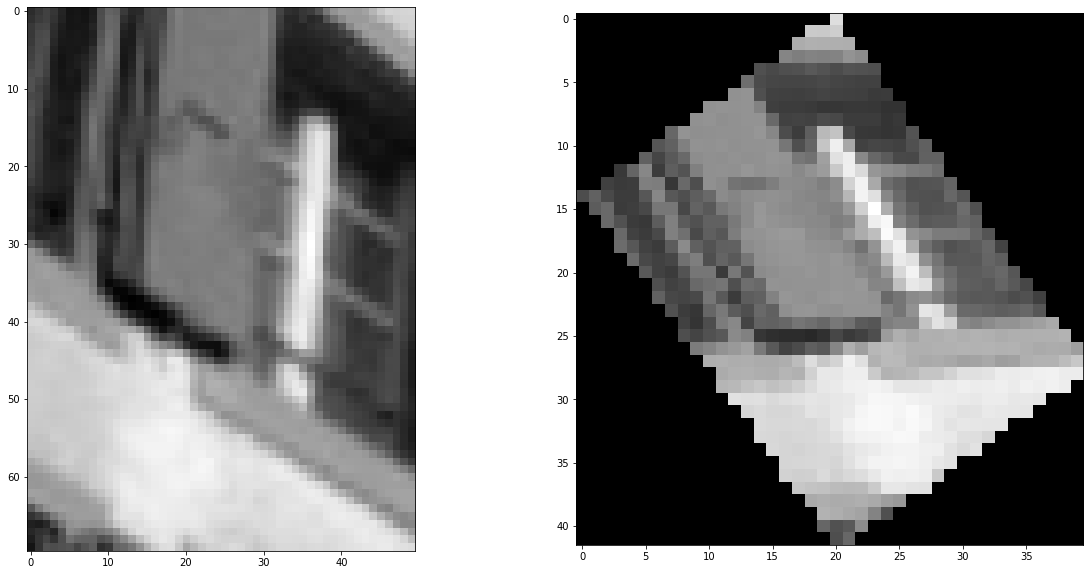

In [ ]:
theta = -36*np.pi/180
t = np.array([0,0])
s = 0.5

def h (x, y) :
    global theta, t
    R = np.array([[s*np.cos(theta), - s*np.sin(theta), t[0]],
                 [s*np.sin(theta),   s*np.cos(theta), t[1]],
                 [0            , 0              ,  1 ]]) 
    
    out = R @ np.array([[x],[y],[1]])
    return(out[0]/out[2], out[1]/out[2])

def h_inv (x, y):
    global theta, t
    R_inv = np.array([[np.cos(theta)/s,  np.sin(theta)/s, -t[0]],
                      [-np.sin(theta)/s,   np.cos(theta)/s, -t[1]],
                       [0            , 0              ,  1 ]]) 
    
    out = R_inv @ np.array([[x],[y],[1]])   
    return(out[0]/out[2], out[1]/out[2])

    
out = inverse_warp (img, h, h_inv)

fig, axs = plt.subplots(1, 2)
fig.set_size_inches (20, 10)
axs[0].imshow(img, 'gray')
axs[1].imshow(out, 'gray');

# 4. Affine

An affine transformation preserves only parallelism and changes orientation, angles, and lengths.
    
\begin{eqnarray}
    \begin{bmatrix}
        x' \\ y' \\ 1
    \end{bmatrix} & = & 
        \begin{bmatrix}
        a_{00} & a_{01} & t_x \\
        a_{10} & a_{11} & t_y \\
        0 & 0 & 1
    \end{bmatrix} 
    \begin{bmatrix}
        x \\ y \\ 1
    \end{bmatrix} 
\end{eqnarray} 

Note that the "rotation" matrix is allowed to be any possible $2 \times 2$ matrix.

## Code: Affine

width= 50 height= 70
width= 68 height= 59


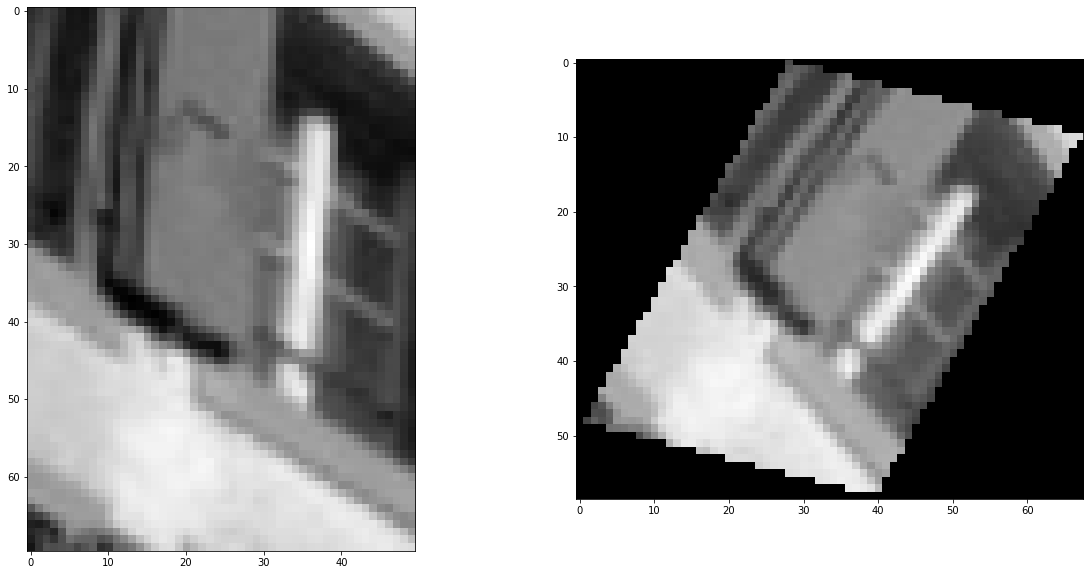

In [ ]:
#a = np.array([[0.8, 0], [0, 0.7]])
#a = np.array([[0.8, 0.1], [0.1, 0.7]])
#a = np.array([[0.8, -0.1], [0.1, 0.7]])
#a = np.array([[0.8, 0.1], [-0.2, 0.7]])
a = np.array([[0.8, -0.4], [0.2, 0.7]])
t = np.array([0,0])


def h (x, y) :
    global a, t
    R = np.array([[a[0,0], a[0,1], t[0]],
                  [a[1,0],  a[1,1], t[1]],
                  [0            , 0              ,  1 ]]) 
    
    out = R @ np.array([[x],[y],[1]])
    return(out[0]/out[2], out[1]/out[2])

def h_inv (x, y):
    global theta, t
    b = np.linalg.inv(a)
    R_inv = np.array([[b[0,0],  b[0,1], -t[0]],
                      [b[1,0],  b[1,1], -t[1]],
                       [0    ,  0     ,  1 ]]) 
    
    out = R_inv @ np.array([[x],[y],[1]])   
    return(out[0]/out[2], out[1]/out[2])

    
out = inverse_warp (img, h, h_inv)

fig, axs = plt.subplots(1, 2)
fig.set_size_inches (20, 10)
axs[0].imshow(img, 'gray')
axs[1].imshow(out, 'gray');

## Question

Can you prove (analytically) that affine transformation preserves parallel lines.


# 5. Stretch and squash

These transformations are restricted forms of affine transformation.
    
\begin{eqnarray}
    \begin{bmatrix}
        x' \\ y' \\ 1
    \end{bmatrix} & = & 
        \begin{bmatrix}
        a_{00} & 0 & t_x \\
        0 & a_{11} & t_y \\
        0 & 0 & 1
    \end{bmatrix}  
    \begin{bmatrix}
        x \\ y \\ 1
    \end{bmatrix}  
\end{eqnarray} 

## Code: Stretch and squash 

width= 50 height= 70
width= 50 height= 42


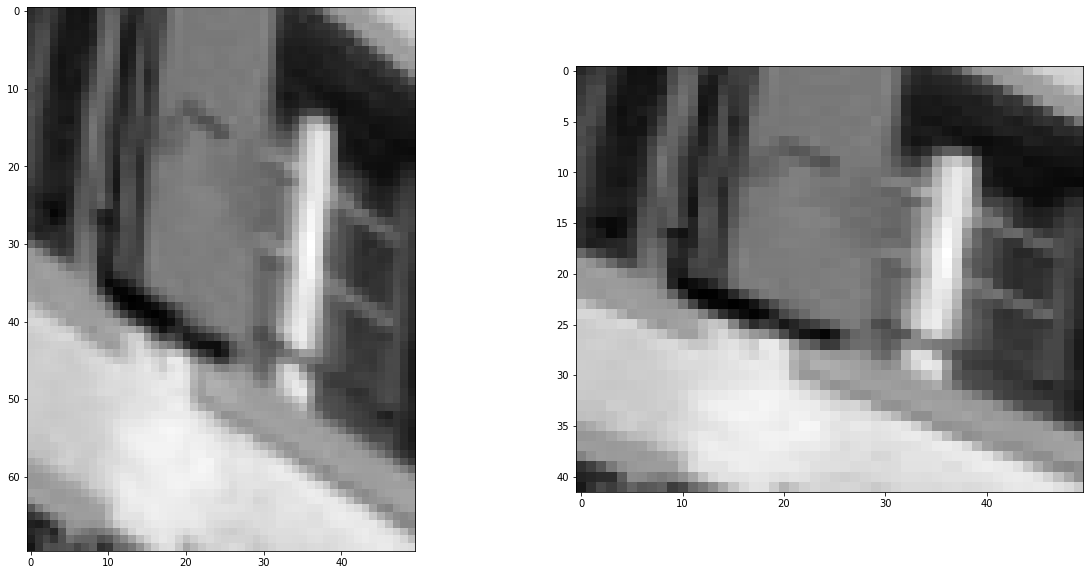

In [ ]:
a = np.array([[1.0, 0], [0, 0.6]])


def h (x, y) :
    global a, t
    R = np.array([[a[0,0], a[0,1], t[0]],
                  [a[1,0],  a[1,1], t[1]],
                  [0            , 0              ,  1 ]]) 
    
    out = R @ np.array([[x],[y],[1]])
    return(out[0]/out[2], out[1]/out[2])

def h_inv (x, y):
    global theta, t
    b = np.linalg.inv(a)
    R_inv = np.array([[b[0,0],  b[0,1], -t[0]],
                      [b[1,0],  b[1,1], -t[1]],
                       [0    ,  0     ,  1 ]]) 
    
    out = R_inv @ np.array([[x],[y],[1]])   
    return(out[0]/out[2], out[1]/out[2])

    
out = inverse_warp (img, h, h_inv)

fig, axs = plt.subplots(1, 2)
fig.set_size_inches (20, 10)
axs[0].imshow(img, 'gray')
axs[1].imshow(out, 'gray');

# 6. Projective

This transformation, which is very commonly used in computer vision, preserves only straight lines, i,e. straight lines gets matched to straight lines, but other properties are not preserved including parallelism. This is the geometric model relating two perspective views of a plane. We will study this later.
    
\begin{eqnarray}
    \begin{bmatrix}
        a \\ b \\ c
    \end{bmatrix} & = & 
        \begin{bmatrix}
        h_{00} & h_{01} & h_{02}\\
        h_{10} & h_{11} & h_{12} \\
        h_{20} & h_{21} & h_{22}
    \end{bmatrix} 
    \begin{bmatrix}
        x \\ y \\ 1
    \end{bmatrix}  \\
    \widetilde{\mathbf{x}'} & = & \widetilde{\mathbf{H}} \widetilde{\mathbf{x}} \\
    \mathbf{x} & = & \begin{bmatrix}
        a/c \\ b/c
    \end{bmatrix}
\end{eqnarray} 
    
Lines are also transformed into lines by homography. Similar relationship can be derived for the other transformations.
    
\begin{eqnarray}
    \widetilde{\mathbf{x}'} & = & \widetilde{\mathbf{H}} \widetilde{\mathbf{x}}   \\
    \widetilde{\mathbf{x}} & = & \widetilde{\mathbf{H}}^{-1} \widetilde{\mathbf{x}'}  \\
    \widetilde{\mathbf{n}}^{T} \widetilde{\mathbf{x}} & = & 0 \\
    \widetilde{\mathbf{n}}^{T} \widetilde{\mathbf{H}}^{-1} \widetilde{\mathbf{x}'} & = & 0 \\
    (\widetilde{\mathbf{n}}^{T} \widetilde{\mathbf{H}}^{-1}) \widetilde{\mathbf{x}'} & = & 0 \\
    (\widetilde{\mathbf{H}}^{-T}\widetilde{\mathbf{n}} )^{T} \widetilde{\mathbf{x}'} & = & 0 \\
    \widetilde{\mathbf{n}'} & = & (\widetilde{\mathbf{H}}^{-T}\widetilde{\mathbf{n}} )
\end{eqnarray}

## Code: Projective

width= 50 height= 70
width= 78 height= 57


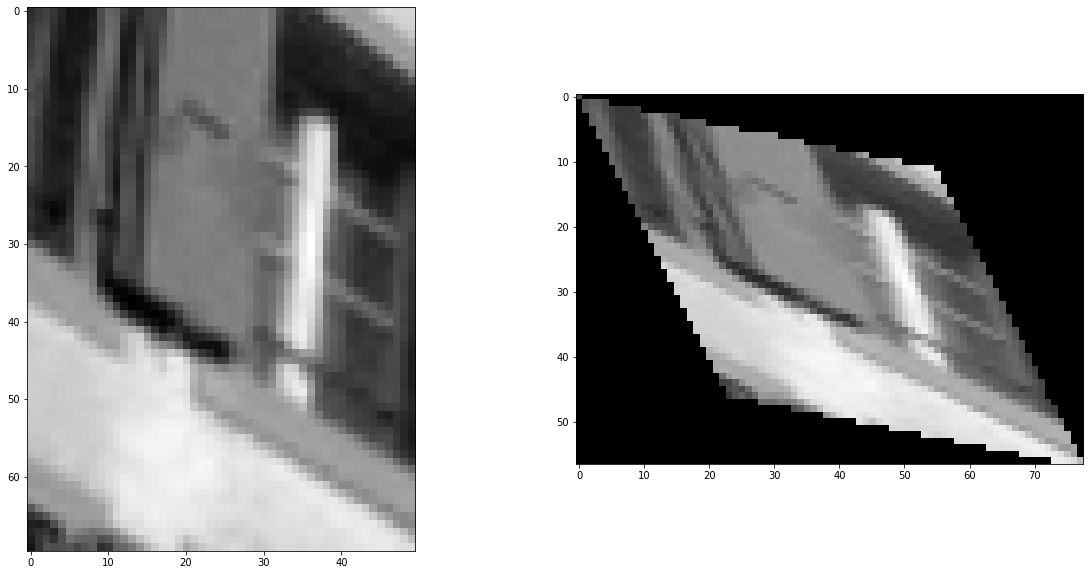

In [ ]:
# Different possibiliies for H
H = np.array([[1.0,  0.3,  0], 
              [0.2,  0.6,  0], 
              [0.01, 0.01, 0.2]])
H = np.array([[1.0, 0,   0], 
              [0,   0.6, 0], 
              [0,   0,   0.9]])
H = np.array([[1.0, 0.3, 0], 
              [0.2, 0.6, 0], 
              [0,   0, 0.9]])


def h (x, y) :
    global H
    out = H @ np.array([[x],[y],[1]])
    return(out[0]/out[2], out[1]/out[2])

def h_inv (x, y):
    global H
    H_inv = np.linalg.inv(H)
    out = H_inv @ np.array([[x],[y],[1]])   
    return(out[0]/out[2], out[1]/out[2])

    
out = inverse_warp (img, h, h_inv)

fig, axs = plt.subplots(1, 2)
fig.set_size_inches (20, 10)
axs[0].imshow(img, 'gray')
axs[1].imshow(out, 'gray');

# ADVANCED MATERIAL 

**The rest of the material in this notebook is advanced content that is not part of the undergraduate level computer vision course.**

## Lens distortion

* See Fig. 2.13 on page 59 of pdf for examples of lens distortions. 

* Mathematically, the simplest radial distortion models can be expressed using low-order polynomials. What is the relationship between lens distorted coordinates $(\hat{x}_c, \hat{y}_c)$ and undistorted coordinates $(x_c, y_c)$? 
    
\begin{equation} 
\begin{bmatrix} \hat{x}_c \\  \hat{y}_c \end{bmatrix} =
\begin{bmatrix} 
x_c (1 + \kappa_1 r^2 + \kappa_2 r^4) \\
y_c (1 + \kappa_1 r^2 + \kappa_2 r^4)
\end{bmatrix}
\end{equation}

* The coordinates $(x_c, y_c)$  and the radius $r$ are defined with respect to the center of the image. 

* Inverse is complicated to compute. No explicit inverse function exists. Iterative stratgies are typically used to approximate the inverse map, hence can be slow for all pixels of an image.

* Let $ \hat{r} = \sqrt{\hat{x}_c^2 + \hat{y}_c^2}$

* Note $ \hat{r}^2 = \hat{x}_c^2 + \hat{y}_c^2   = (x_c^2 + y_c^2) (1 + \kappa_1 r^2 + \kappa_2 r^4)^2 =  r^2 (1 + \kappa_1 r^2 + \kappa_2 r^4)^2$

* We have $ \hat{r} = r (1 + \kappa_1 r^2 + \kappa_2 r^4) $

* Our goal is to find $r = f^{-1}(\hat{r})$. 

* Then $x_c = \hat{x}_c \frac{r}{\hat{r}}$ and $y_c = \hat{y}_c  \frac{r}{\hat{r}}$

* $ r = \frac{\hat{r}}{(1 + \kappa_1 r^2 + \kappa_2 r^4)} $, here $\hat{r}$ is known, we have to find $r$

* We can setup an iterative solution strategy. Start with an initial estimate of $r_0 = \hat{r}$ and then iterate until convergence.

\begin{equation}
 r_{n+1} = \frac{\hat{r}}{(1 + \kappa_1 r_n^2 + \kappa_2 r_n^4)} 
\end{equation}

* Repeat the above for each pixel.






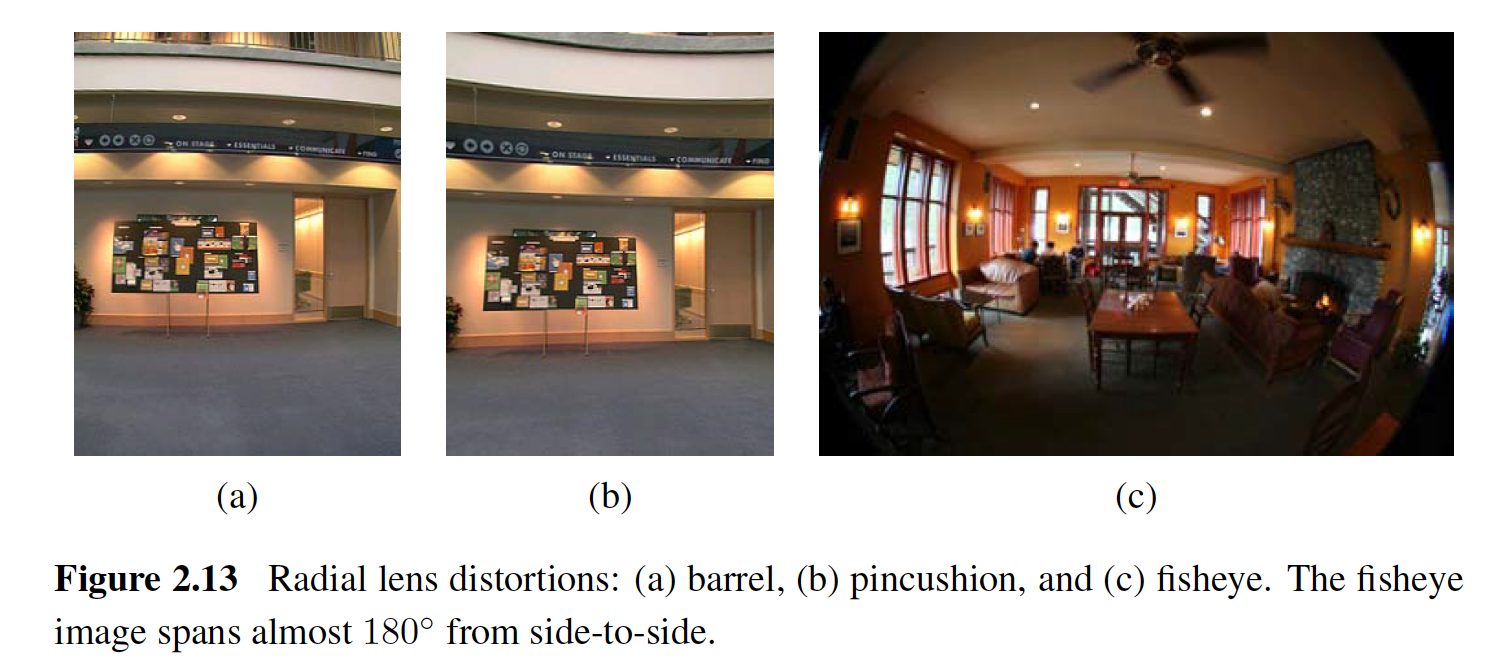

## Code: Lens Distortion

Center:  25.0 35.0
width= 50 height= 70
width= 62 height= 88


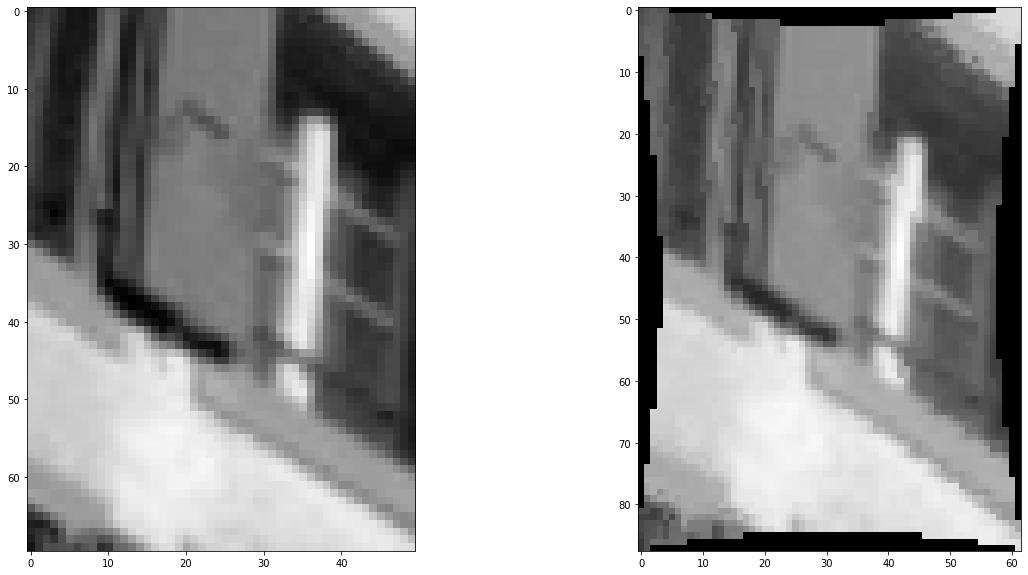

In [ ]:
kappa_1 = 0.00014
kappa_2 = 0 #0.00000012
c_x = 0
c_y = 0


def h (x, y) :
    global c_x, c_y, kappa_1, kappa_2
    x = x - c_x 
    y = y - c_y
    r_sq = np.power(x, 2) + np.power(y, 2)
    distortion_factor = 1 + kappa_1*r_sq + kappa_2*r_sq*r_sq
    x_h = x * distortion_factor + c_x
    y_h = y * distortion_factor + c_y

    return(np.round(x_h), np.round(y_h))

def h_inv (x_h, y_h):
    global c_x, c_y, kappa_1, kappa_2

    x_h = x_h - c_x
    y_h = y_h - c_y 

    r_h = np.sqrt(np.power(x_h, 2) + np.power(y_h, 2))
    if r_h == 0 :
        return (c_x, c_y)
    else:
        r_now = 9999.0
        r_next = r_h
        while (np.abs(r_next - r_now) > 0.01) :
            r_now = r_next
            distortion_factor = 1 + kappa_1* np.power(r_now, 2) + kappa_2*np.power(r_now, 4)
            r_next = r_h/distortion_factor
            #print(r_now, r_next)

        x = x_h*r_next/r_h + c_x
        y = y_h*r_next/r_h + c_y
        return(np.round(x), np.round(y))

c_y, c_x = img.shape
c_x = c_x/2; c_y = c_y/2
print('Center: ', c_x, c_y)

out = inverse_warp (img, h, h_inv)

fig, axs = plt.subplots(1, 2)
fig.set_size_inches (20, 10)
axs[0].imshow(img, 'gray')
axs[1].imshow(out, 'gray');

## Transformation Groups

A (mathematical) [group](https://www.mathsisfun.com/sets/groups-introduction.html) is a set (points in 2D in our case) together with an operation (one of the geometric transformations we have studied above) and exhibit the four properties: closure, associativity, identity and invertibility.

The geometric transformations that we have studied (with some restrictions on degenerate values) along with the set of 2D points form closed groups. In fact, they form a nested set of groups.  Which transformations exhibit this property?
    
1. Rigid transformations form a group as it is invertible. 

2. Not all affine and projective are invertible. If we restrict these transformations to be invertible then they form groups. 

3. They all have the other three properties. 

## Notation Conventions

We will use the following notation to generically represent these transformations.

\begin{equation}
    \mathbf{f} (\widetilde{\mathbf{x_i}}; \mathbf{p})
\end{equation}

where $\mathbf{p}$ is the set of parameters to be estimated. Note that the range of this function is vector valued and the domain of the function is also vector-valued.
    
For numerical convenience of choosing initialization, we usually reparameterize the transformations so that when the parameters, $\mathbf{p}$, are all zero, i.e., the point does not move. To achieve this we add a 1 to the first two diagonal values of the transformation matrix. See Table 6.1

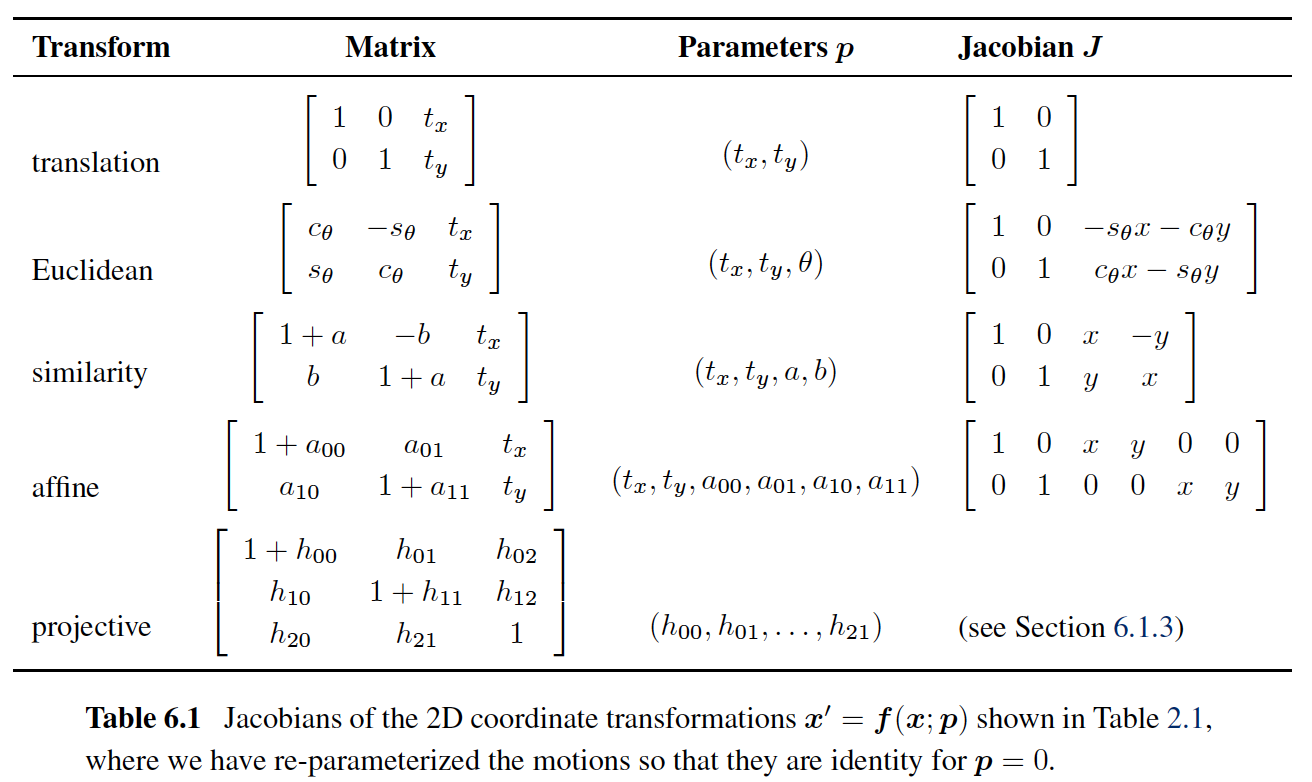

## What is Jacobian?

* The quantity Jacobian is named are [Carl Gustav Jacob Jacobi](https://en.wikipedia.org/wiki/Carl_Gustav_Jacob_Jacobi).

* A Jacobian, denoted by $\mathbf{J}$, is the derivative of a vector-valued function, such as the transformation functions that we have $\mathbf{f} (\widetilde{\mathbf{x_i}}; \mathbf{p})$, with respect to the parameters, $\mathbf{p}$. It is a matrix of first derivatives that will be used in the estimation process. 

* The Jacobian matrix in our case *could* be function of both ${\mathbf{x_i}}$ and $\mathbf{p}$, which can be explicitly denoted using $J (\widetilde{\mathbf{x_i}}; \mathbf{p})$. If the Jacobian is a function of the parameters, $\mathbf{p}$, then we have a **non-linear estimation problem** at hand, and we will need an interactive estimation process. If the Jacobian is not a function of the parameters, $\mathbf{p}$, then we have a **linear estimation problem** and can have the solution in closed form, in one-shot. Note that this concept of linearity is different from the transformation itself is linear or non-linear. The function linearity and estimation linearity are two different concepts.

* This Jacobian will be an $d \times n$ matrix, where the number of dimensions is d and the number of parameters is $n$. The $ij$-th entry of this matrix  $J_{ij} = \frac{\partial f_i}{\partial p_j}$.

\begin{equation}
\mathbf{J} = 
\begin{bmatrix}
    \dfrac{\partial \mathbf{f}}{\partial p_1} & \cdots & \dfrac{\partial \mathbf{f}}{\partial p_{n}} 
    \end{bmatrix}
= \begin{bmatrix}
    \nabla^T f_1 \\  
    \vdots \\
    \nabla^T f_d   
    \end{bmatrix}
= \begin{bmatrix}
    \dfrac{\partial f_1}{\partial x_1} & \cdots & \dfrac{\partial f_1}{\partial x_n}\\
    \vdots & \ddots & \vdots\\
    \dfrac{\partial f_d}{\partial x_1} & \cdots & \dfrac{\partial f_d}{\partial x_n} \end{bmatrix}
\end{equation}
    

## Jacobian for Translation

\begin{eqnarray}
    \mathbf{f} (\widetilde{\mathbf{x_i}}; \mathbf{p}) = 
\begin{bmatrix}
    f_x \\ f_y \\ 1
\end{bmatrix}  & = & 
    \begin{bmatrix}
        1 & 0 & t_x \\
        0 & 1 & t_y \\
        0  & 0 & 1
    \end{bmatrix} 
    \begin{bmatrix}
        x_i \\ y_i \\ 1
    \end{bmatrix} 
\end{eqnarray}
   
The parameter vector is two dimensional and is given by  
$\mathbf{p} = 
\begin{bmatrix}
    t_x \\ t_y 
\end{bmatrix}$. 

The Jacobian, corresponding to the $i$-the point, $\mathbf{J(x_i; p)}$ is given by
   
\begin{eqnarray}
    \mathbf{J(x_i; p)} & = & 
    \frac{\partial}{\partial \mathbf{p}} \mathbf{f}(\widetilde{\mathbf{x_i}}; \mathbf{p})\\
    & = & 
    \begin{bmatrix}
        \frac{\partial}{\partial t_x} f_x & 
        \frac{\partial}{\partial t_y} f_x \\
        \frac{\partial}{\partial t_x} f_y & 
        \frac{\partial}{\partial t_y} f_y \\
    \end{bmatrix} \\
    & = & 
    \begin{bmatrix}
        1 & 0  \\
        0 & 1 
    \end{bmatrix}
\end{eqnarray} 

## Jacobian for Euclidean (rigid motion) 2D rotation + translation

2D rigid motion is characterized by a 2D rotation matrix and a translation vector.

\begin{eqnarray}
    \mathbf{f} (\widetilde{\mathbf{x_i}}; \mathbf{p}) = 
\begin{bmatrix}
    f_x \\ f_y \\ 1
\end{bmatrix} 
    & = & 
    \begin{bmatrix}
        \cos \theta & - \sin \theta & t_x \\
        \sin \theta & \cos \theta & t_y \\
        0  & 0 & 1
    \end{bmatrix} 
    \begin{bmatrix}
        x_i \\ y_i \\ 1
    \end{bmatrix}
\end{eqnarray}
   
The parameter vector is three dimensional and is given by  $\mathbf{p} = 
\begin{bmatrix}
    t_x \\ t_y \\ \theta
\end{bmatrix}$. 

The Jacobian, corresponding to the $i$-the point, $\mathbf{J(x_i; p)}$ is given by
   
\begin{eqnarray}
    \mathbf{J(x_i; p)} & = & \frac{\partial}{\partial \mathbf{p}} f(\widetilde{\mathbf{x_i}}; \mathbf{p})\\
    & = & 
    \begin{bmatrix}
        \frac{\partial}{\partial t_x} f_x & 
        \frac{\partial}{\partial t_y} f_x & 
        \frac{\partial}{\partial \theta} f_x \\
        \frac{\partial}{\partial t_x} f_y & 
        \frac{\partial}{\partial t_y} f_y & 
        \frac{\partial}{\partial \theta} f_y \\
    \end{bmatrix}  \\
    & = & 
    \begin{bmatrix}
        1 & 0 & (-\sin(\theta) x_i - \cos(\theta) y_i) \\
        0 & 1 & (\cos(\theta) x_i - \sin(\theta) y_i)
    \end{bmatrix}
\end{eqnarray} 
    
Note that the Jacobian is a function of the parameter, $\theta$ and the derivative of the residual will not yield a linear equation from which we can derive a closed form solution. Unlike for the translation case, there is no linear inversion process to estimate the parameters for rigid motion. 

## Jacobian for Similarity Transformation Estimation 

The similarity transformation is comprised of a compress and strech plus translation.

\begin{eqnarray}
    \mathbf{f} (\widetilde{\mathbf{x_i}}; \mathbf{p}) = 
\begin{bmatrix}
    f_x \\ f_y \\ 1
\end{bmatrix} 
    & = & 
    \begin{bmatrix}
        1+a & - b & t_x \\
        b & 1+a & t_y \\
        0  & 0 & 1
    \end{bmatrix} 
    \begin{bmatrix}
        x_i \\ y_i \\ 1
    \end{bmatrix}
\end{eqnarray}

The parameter vector is four dimensional 
$\mathbf{p} = 
\begin{bmatrix}
    t_x \\ t_y \\ a \\ b
\end{bmatrix}$. 

Note that we have parameterized the transformation in such a way that $\mathbf{f} (\widetilde{\mathbf{x_i}}; \mathbf{p}=0) = \widetilde{\mathbf{x_i}}$ or $\mathbf{p}=0$ results in an identity transformation.



The Jacobian, corresponding to the $i$-the point, $\mathbf{J(x_i)}$ is given by
\begin{equation}
    \mathbf{J(\mathbf{x_i})} = \begin{bmatrix}
        \frac{\partial}{\partial t_x} f_x & 
        \frac{\partial}{\partial t_y} f_x & 
        \frac{\partial}{\partial a} f_x & 
        \frac{\partial}{\partial b} f_x \\
        \frac{\partial}{\partial t_x} f_y & 
        \frac{\partial}{\partial t_y} f_y & 
        \frac{\partial}{\partial a} f_y & 
        \frac{\partial}{\partial b} f_y \\
    \end{bmatrix}  = \begin{bmatrix}
        1 & 0 & x_i & -y_i \\
        0 & 1 & y_i & x_i
    \end{bmatrix}
\end{equation}

Note that this Jacobian is not a function of the function parameters, so we can have a linear estimate for it.

## Jacobian for Affine Transformation

The affine transformation is further generalized version of the similarity transform.

\begin{eqnarray}
    \mathbf{f} (\widetilde{\mathbf{x_i}}; \mathbf{p}) = 
\begin{bmatrix}
    f_x \\ f_y \\ 1
\end{bmatrix} 
    & = & 
    \begin{bmatrix}
        1+a_{00} & a_{01} & t_x \\
        a_{10} & 1+a_{11} & t_y \\
        0  & 0 & 1
    \end{bmatrix} 
    \begin{bmatrix}
        x_i \\ y_i \\ 1
    \end{bmatrix}
\end{eqnarray}

The parameter vector is four dimensional 
$\mathbf{p} = 
\begin{bmatrix}
    a_{00} \\ a_{01} \\ t_x \\ a_{10} \\ a_{11} \\ t_y
\end{bmatrix}$. 

Like earlier, we have parameterized the transformation in such a way that $\mathbf{f} (\widetilde{\mathbf{x_i}}; \mathbf{p}=0) = \widetilde{\mathbf{x_i}}$ or $\mathbf{p}=0$ results in an identity transformation.



The Jacobian, corresponding to the $i$-the point, $\mathbf{J(x_i)}$ is given by


\begin{eqnarray}
    \frac{\partial}{\partial \mathbf{p}} f (\widetilde{\mathbf{x_i}}; \mathbf{p}) & = & 
\begin{bmatrix}
        \frac{\partial}{\partial a_{00}} f_x & 
        \frac{\partial}{\partial a_{01}} f_x & 
        \frac{\partial}{\partial t_x} f_x & 
        \frac{\partial}{\partial a_{10}} f_x &
        \frac{\partial}{\partial a_{11}} f_x &
        \frac{\partial}{\partial t_y} f_x \\
        \frac{\partial}{\partial a_{00}} f_y & 
        \frac{\partial}{\partial a_{01}} f_y & 
        \frac{\partial}{\partial t_x} f_y & 
        \frac{\partial}{\partial a_{10}} f_y &
        \frac{\partial}{\partial a_{11}} f_y &
        \frac{\partial}{\partial t_y} f_y
        \end{bmatrix}  \\
    & = & 
\begin{bmatrix}
    x_i & y_i & 1 & 0     & 0 & 0\\
    0   & 0   & 0 & x_i & y_i & 1
\end{bmatrix}
\end{eqnarray}

Note that like the similarity transform the components of the Jacobian do not involve the parameters being estimated. Because of this property, we would be able to solve this particular problem in a non-iterative fashion, i.e. there is a closed form expression of the solution.

## Jacobian for 2D Perspective Transform
    
Recall that the transformation can be represented as 
    
\begin{eqnarray}
    \begin{bmatrix}
        a \\ b \\ c
    \end{bmatrix} & = & 
    \begin{bmatrix}
        h_{00} & h_{01} & h_{02}\\
        h_{10} & h_{11} & h_{12} \\
        h_{20} & h_{21} & h_{22}
    \end{bmatrix} 
    \begin{bmatrix}
        x \\ y \\ 1
    \end{bmatrix}  \\
    \widetilde{\mathbf{x}'} & = & \widetilde{\mathbf{H}} \widetilde{\mathbf{x}} \\
    \mathbf{x}' = 
    \begin{bmatrix} 
    x' \\ y' 
    \end{bmatrix}
    & = & 
    \begin{bmatrix}
        a/c \\ b/c
    \end{bmatrix}
\end{eqnarray} 
    
Note that scaling of the transformation matrix, $\widetilde{\mathbf{H}} $, results in the same point $\mathbf{x}'$. This means that the transformation matrix can be known only up to a scale. Another aspect of this is that there are infinite number of solutions. To constrain the solution space, we can one of the parameters of the transformation matrix to a constant value. Typically, this is $h_{22}$, which is set to 1.  This, along with reparameterization of the transformation so that $\mathbf{p} = \mathbf{0}$ is the identity transformation, we arrive at the following effective representation of the transformation.

\begin{eqnarray}
    \begin{bmatrix}
        a \\ b \\ D
    \end{bmatrix} & = & 
    \begin{bmatrix}
        1+h_{00} & h_{01} & h_{02}\\
        h_{10} & 1+h_{11} & h_{12} \\
        h_{20} & h_{21} & 1
    \end{bmatrix} 
    \begin{bmatrix}
        x_i \\ y_i \\ 1
    \end{bmatrix}  \\
    \mathbf{\hat{x}}' = \begin{bmatrix} \hat{x}_i' \\ \hat{y}_i' \end{bmatrix}
    & = & 
    \begin{bmatrix}
        a/D \\ b/D
    \end{bmatrix}
\end{eqnarray} 
    
    
The parameter vector is eight dimensional and is given by  $\mathbf{p} = \begin{bmatrix}
    h_{00} & h_{01} & \cdots & h_{21}
\end{bmatrix}^T$. 

The Jacobian, corresponding to the $i$-the point, $\mathbf{J(x_i; p)}$ is given by

\begin{eqnarray}
    \mathbf{J(x_i; p)} & = & \frac{\partial}{\partial \mathbf{p}} f(\widetilde{\mathbf{x_i}}; \mathbf{p})\\
    & = & \begin{bmatrix}
            \frac{\partial}{\partial h_{00}} \hat{x}_i' & 
            \frac{\partial}{\partial h_{01}} \hat{x}_i' & \cdots & \frac{\partial}{\partial h_{21}} \hat{x}_i' \\
            \frac{\partial}{\partial h_{00}} \hat{y}_i' & 
            \frac{\partial}{\partial h_{01}} \hat{y}_i' & \cdots & \frac{\partial}{\partial h_{21}} \hat{y}_i' \\
    \end{bmatrix} 
\end{eqnarray} 

\begin{eqnarray}
\hat{x}_i' & = & \frac{(1+h_{00}) x_i + h_{01} y_i + h_{02}}{h_{20} x_i + h_{21} y_i + 1} \\
\hat{y}_i' & = & \frac{(1+h_{10}) x_i + h_{11} y_i + h_{12}}{h_{20} x_i + h_{21} y_i + 1} \\
\end{eqnarray}

Note $\frac{\partial \hat{x}_i'}{\partial h_{10}} = \frac{\partial \hat{x}_i'}{\partial h_{11}} = \frac{\partial \hat{x}_i'}{\partial h_{12}} = 0$, as $\hat{x}_i'$ does not depend on these parameters. Similarly, $\frac{\partial \hat{y}_i'}{\partial h_{00}} = \frac{\partial \hat{y}_i'}{\partial h_{01}} = \frac{\partial \hat{y}_i'}{\partial h_{02}} = 0$.

For ease of notation, let us use $D$ to represent the denominator,  $h_{20} x_i + h_{21} y_i + 1$. Then, $\frac{\partial \hat{x}_i'}{\partial h_{00}} = \frac{x_i}{D}$, $\frac{\partial \hat{x}_i'}{\partial h_{01}} = \frac{y_i}{D}$, and $\frac{\partial \hat{x}_i'}{\partial h_{02}} = \frac{1}{D}$.

And,
\begin{eqnarray}
     \frac{\partial \hat{x}_i'}{\partial h_{20}} & = & - \frac{x_i}{D^2} ( (1+h_{00}) x_i + h_{01} y_i + h_{02}) \\
     & = & - \frac{x_i}{D} \frac{(1+h_{00}) x_i + h_{01} y_i + h_{02}}{D} \\
     & = & - \frac{x_i \hat{x}_i'}{D}
\end{eqnarray}

\begin{eqnarray}
     \frac{\partial \hat{x}_i'}{\partial h_{21}} & = & - \frac{y_i}{D^2} ( (1+h_{00}) x_i + h_{01} y_i + h_{02}) \\
     & = & - \frac{y_i}{D} \frac{(1+h_{00}) x_i + h_{01} y_i + h_{02}}{D} \\
     & = & - \frac{y_i \hat{x}_i'}{D}
\end{eqnarray}

The Jacobian for projective transformation (homography) is given by 

\begin{equation}
    J(\mathbf{x_i}; \mathbf{p}) = \frac{1}{D}
\begin{bmatrix}
    x_i & y_i & 1 & 0 & 0 & 0 & - x_i \hat{x}_i' & - y_i \hat{x}_i'\\
    0 & 0 & 0 & x_i & y_i & 1  & - x_i \hat{y}_i'  & - y_i \hat{y}_i'
\end{bmatrix}\end{equation}

Note that the $(\hat{x}_i', \hat{y}_i')$ and the denominator $D = h_{20} x_i + h_{21} y_i + 1$, depend on the current parameter settings.

Also note that the Jacobian involves predicted feature locations based on the current model parameters, $(\hat{x}_i', \hat{y}_i')$,  instead of sensed feature locations in the next image, $({x}_i', {y}_i')$.
